In [11]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [3]:
n_classes = 3
plot_colours = "bgr"
plot_step = 0.002

In [5]:
train_feat, test_feat, train_target, test_target = train_test_split(iris.data, iris.target, test_size=0.1, random_state=0, stratify=iris.target)

DecisionTreeRegressor()
0.9
DecisionTreeClassifier()
0.9333333333333333
DecisionTreeClassifier(max_depth=3)
0.8666666666666667
DecisionTreeClassifier(max_depth=5)
0.9333333333333333
DecisionTreeClassifier(max_depth=1)
0.6666666666666666


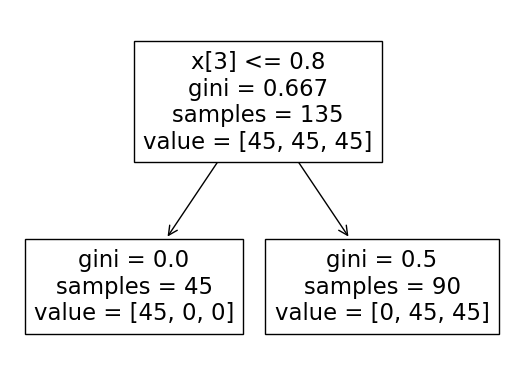

In [12]:
models = [DecisionTreeRegressor(), DecisionTreeClassifier(), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=1)]
for model in models:
    print(model)
    model.fit(train_feat, train_target)
    print(model.score(test_feat, test_target))
    plot_tree(model)

In [ ]:
c = DecisionTreeClassifier()
c.fit(train_feat, train_target)
f"{c.score(test_feat, test_target):%}"

'93.333333%'

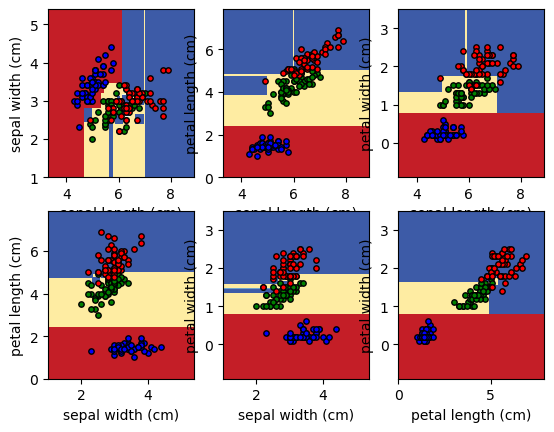

In [ ]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), plot_colours):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor="black", s=15)

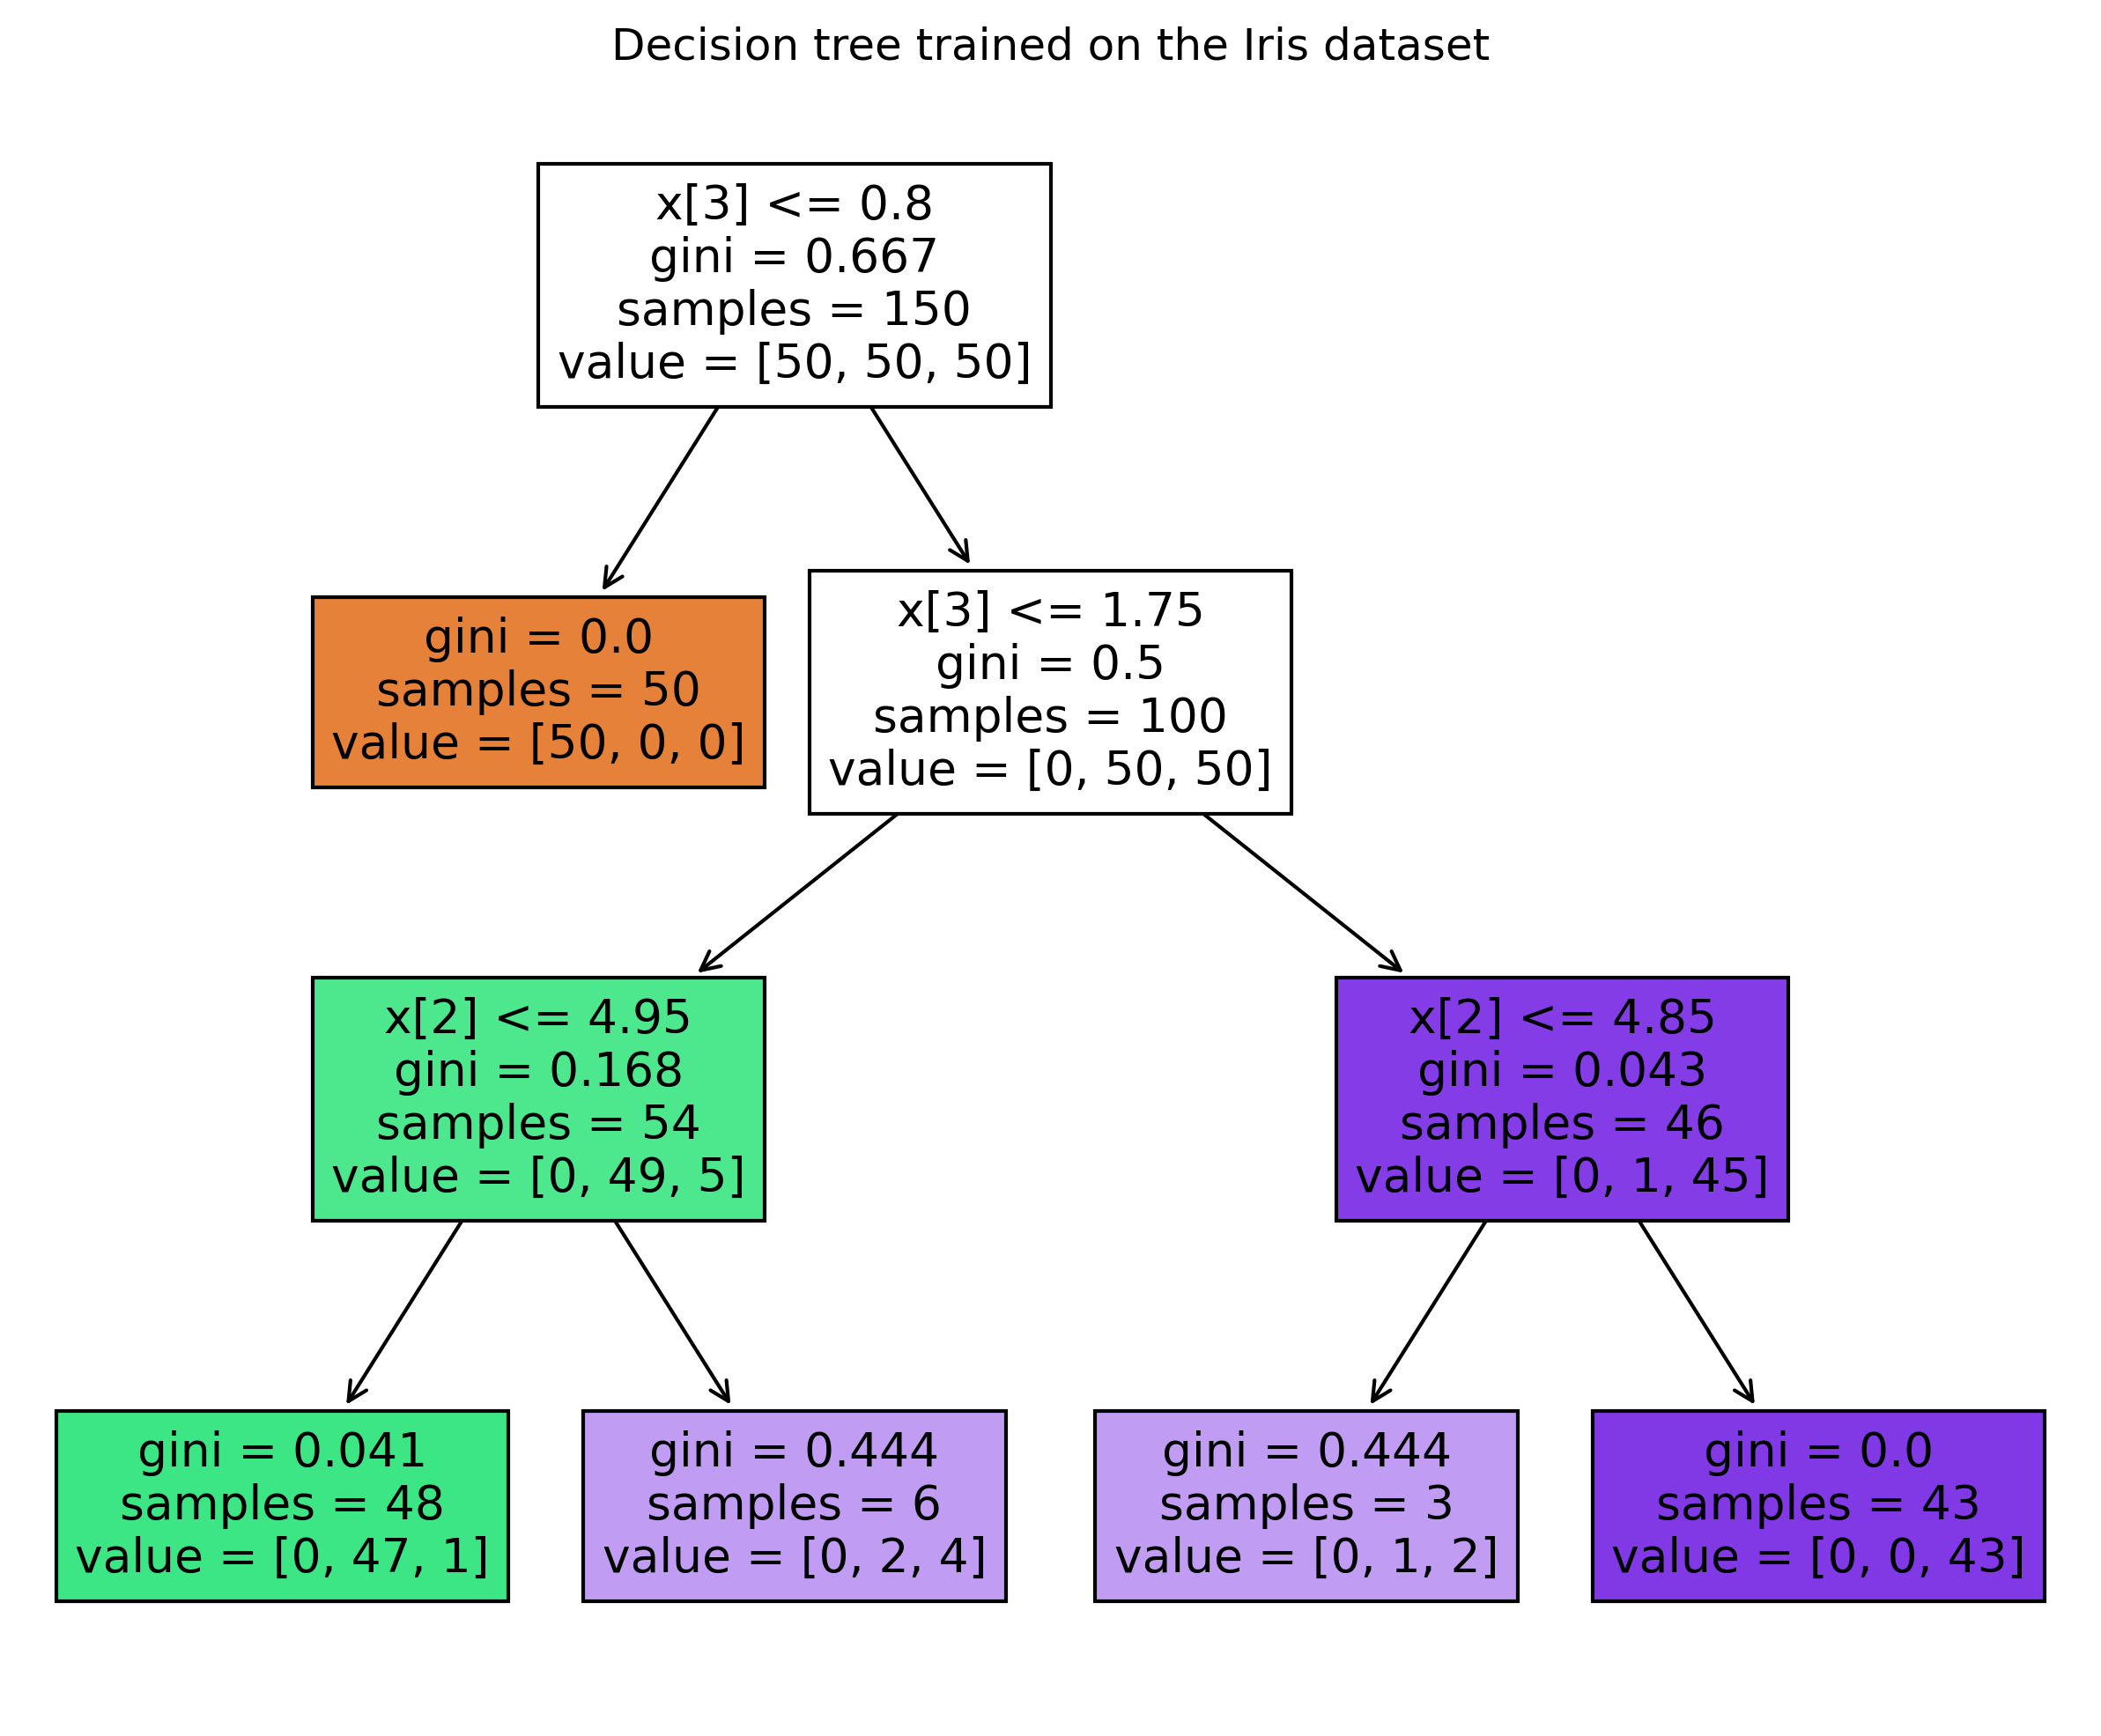

In [ ]:
from sklearn.tree import plot_tree

plt.figure(dpi=300, figsize=(10, 8))
plot_tree(c, filled=True)
plt.title("Decision tree trained on the Iris dataset")
plt.show()